In [1]:
import numpy as np
import progressbar
import pandas as pd
import seaborn
from scipy.stats import poisson,skellam
from scipy.optimize import minimize
import matplotlib.pyplot as plt

loc = "Data/England/"

raw_data_6 = pd.read_csv(loc + '05-06.csv')[:380]
raw_data_7 = pd.read_csv(loc + '06-07.csv')[:380]
raw_data_8 = pd.read_csv(loc + '07-08.csv')[:380]
raw_data_9 = pd.read_csv(loc + '08-09.csv')[:380]
raw_data_10 = pd.read_csv(loc + '09-10.csv')[:380]
raw_data_11 = pd.read_csv(loc + '10-11.csv')[:380]
raw_data_12 = pd.read_csv(loc + '11-12.csv')[:380]
raw_data_13 = pd.read_csv(loc + '12-13.csv')[:380]
raw_data_14 = pd.read_csv(loc + '13-14.csv')[:380]
raw_data_15 = pd.read_csv(loc + '14-15.csv')[:380]
raw_data_16 = pd.read_csv(loc + '15-16.csv')[:380]
raw_data_17 = pd.read_csv(loc + '16-17.csv')[:380]
raw_data_18 = pd.read_csv(loc + '17-18.csv')[:380]
raw_data_19 = pd.read_csv(loc + '18-19.csv')[:380]

raw_data_19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


mean home goals and away goals

In [2]:
def get_goal_means(df):
    HA_avg = df[['FTHG', 'FTAG']].astype(int).mean()
    return HA_avg
gmean_6 = get_goal_means(raw_data_6)
gmean_7 = get_goal_means(raw_data_7)
gmean_8 = get_goal_means(raw_data_8)
gmean_9 = get_goal_means(raw_data_9)
gmean_10 = get_goal_means(raw_data_10)
gmean_11 = get_goal_means(raw_data_11)
gmean_12 = get_goal_means(raw_data_12)
gmean_13 = get_goal_means(raw_data_13)
gmean_14 = get_goal_means(raw_data_14)
gmean_15 = get_goal_means(raw_data_15)
gmean_16 = get_goal_means(raw_data_16)
gmean_17 = get_goal_means(raw_data_17)
gmean_18 = get_goal_means(raw_data_18)
gmean_19 = get_goal_means(raw_data_19)

In [3]:
all_gmeans = pd.concat([gmean_6,gmean_7,gmean_8,gmean_9,gmean_10], ignore_index=True)

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


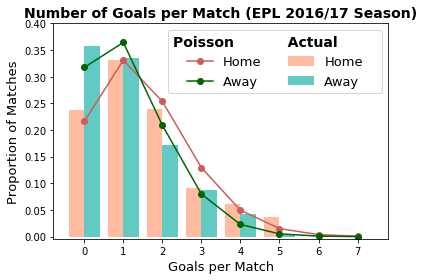

In [4]:
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack(
    [[poisson.pmf(i, gmean_18[j]) 
      for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(raw_data_18[['FTHG', 'FTAG']].astype(int).values, 
         range(9), alpha=0.7, label=['Home', 'Away'],
         normed=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [5]:
# probability of draw between home and away team
skellam.pmf(0.0,  gmean_18.FTHG,  gmean_18.FTAG)

0.2538008836380457

In [6]:
# probability of home team winning by one goal
skellam.pmf(1,  gmean_18.FTHG,  gmean_18.FTAG)

0.22886603504134242

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


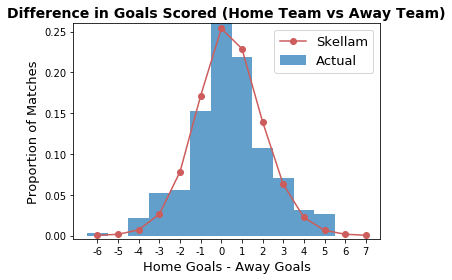

In [7]:
skellam_pred = [skellam.pmf(i,  gmean_18.FTHG,  gmean_18.FTAG) for i in range(-6,8)]

plt.hist(raw_data_18[['FTHG']].astype(int).values - raw_data_18[['FTAG']].astype(int).values, range(-6,8), 
         alpha=0.7, label='Actual',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [8]:

def goal_dist(df, team1, team2):

    fig,(ax1,ax2) = plt.subplots(2, 1)


    team1_home = df[df['HomeTeam']==team1][['FTHG']].astype(int).apply(pd.value_counts,normalize=True)
    team1_home_pois = [poisson.pmf(i,np.sum(np.multiply(team1_home.values.T,team1_home.index.T),axis=1)[0]) for i in range(8)]
    team2_home = df[df['HomeTeam']==team2][['FTHG']].astype(int).apply(pd.value_counts,normalize=True)
    team2_home_pois = [poisson.pmf(i,np.sum(np.multiply(team2_home.values.T,team2_home.index.T),axis=1)[0]) for i in range(8)]

    team1_away = df[df['AwayTeam']==team1][['FTAG']].astype(int).apply(pd.value_counts,normalize=True)
    team1_away_pois = [poisson.pmf(i,np.sum(np.multiply(team1_away.values.T,team1_away.index.T),axis=1)[0]) for i in range(8)]
    team2_away = df[df['AwayTeam']==team2][['FTAG']].astype(int).apply(pd.value_counts,normalize=True)
    team2_away_pois = [poisson.pmf(i,np.sum(np.multiply(team2_away.values.T,team2_away.index.T),axis=1)[0]) for i in range(8)]

    ax1.bar(team1_home.index-0.4,np.array(team1_home.values).reshape(-1),width=0.4,color="#034694",label=team1)
    ax1.bar(team2_home.index,np.array(team2_home.values).reshape(-1),width=0.4,color="#EB172B",label=team2)
    pois1, = ax1.plot([i for i in range(8)], team1_home_pois,
                      linestyle='-', marker='o',label=team1, color = "#0a7bff")
    pois1, = ax1.plot([i for i in range(8)], team2_home_pois,
                      linestyle='-', marker='o',label=team2, color = "#ff7c89")
    leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
    leg.set_title("Poisson                 Actual                ", prop = {'size':'14', 'weight':'bold'})
    ax1.set_xlim([-0.5,7.5])
    ax1.set_ylim([-0.01,0.65])
    ax1.set_xticklabels([])
    # mimicing the facet plots in ggplot2 with a bit of a hack
    ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
            bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})
    ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
            bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})

    ax2.bar(team1_away.index-0.4,np.array(team1_away.values).reshape(-1),width=0.4,color="#034694",label="Chelsea")
    ax2.bar(team2_away.index,np.array(team2_away.values).reshape(-1),width=0.4,color="#EB172B",label="Sunderland")
    pois1, = ax2.plot([i for i in range(8)], team1_away_pois,
                      linestyle='-', marker='o',label=team1, color = "#0a7bff")
    pois1, = ax2.plot([i for i in range(8)], team2_away_pois,
                      linestyle='-', marker='o',label=team2, color = "#ff7c89")
    ax2.set_xlim([-0.5,7.5])
    ax2.set_ylim([-0.01,0.65])
    ax1.set_title("Number of Goals per Match",size=14,fontweight='bold')
    ax2.set_xlabel("Goals per Match",size=13)
    ax2.text(-1.15, 0.9, 'Proportion of Matches', rotation=90, size=13)
    plt.tight_layout()
    plt.show()

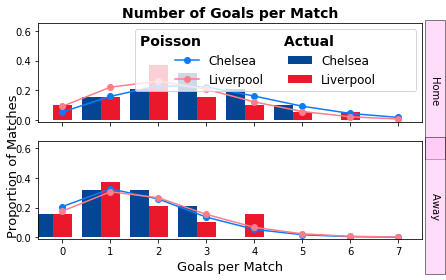

In [9]:
goal_dist(raw_data_19, 'Chelsea', 'Liverpool')

## Building a model

In [10]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
def create_poisson_model(df):
    goal_model_data = pd.concat([df[['HomeTeam','AwayTeam','FTHG']].assign(home=1).rename(
                columns={'HomeTeam':'HomeTeam', 'AwayTeam':'AwayTeam','FTHG':'goals'}),
               df[['AwayTeam','HomeTeam','FTAG']].assign(home=0).rename(
                columns={'AwayTeam':'HomeTeam', 'HomeTeam':'AwayTeam','FTAG':'goals'})])
    goal_model_data[['goals']] = goal_model_data[['goals']].astype(int)
    poisson_model = smf.glm(formula='goals ~ home + HomeTeam + AwayTeam', data=goal_model_data, 
                           family=sm.families.Poisson()).fit()
    return poisson_model
model_6 = create_poisson_model(raw_data_6)
model_7 = create_poisson_model(raw_data_7)
model_8 = create_poisson_model(raw_data_8)
model_9 = create_poisson_model(raw_data_9)
model_10 = create_poisson_model(raw_data_10)
model_11 = create_poisson_model(raw_data_11)
model_12 = create_poisson_model(raw_data_12)
model_13 = create_poisson_model(raw_data_13)
model_14 = create_poisson_model(raw_data_14)
model_15 = create_poisson_model(raw_data_15)
model_16 = create_poisson_model(raw_data_16)
model_17 = create_poisson_model(raw_data_17)
model_18 = create_poisson_model(raw_data_18)
model_19 = create_poisson_model(raw_data_19)
#creating a general model
poisson_model = create_poisson_model(pd.concat([raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,\
                                                raw_data_12,raw_data_13,raw_data_14,raw_data_15,raw_data_16,raw_data_17,\
                                                raw_data_18,raw_data_19], ignore_index=True))

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [30]:
poisson_model.predict(pd.DataFrame(data={'HomeTeam': 'Chelsea', 'AwayTeam': 'Arsenal',
                                       'home':1},index=[1]))

1    1.701534
dtype: float64

In [31]:
poisson_model.predict(pd.DataFrame(data={'HomeTeam': 'Arsenal', 'AwayTeam': 'Chelsea',
                                       'home':1},index=[1]))

1    1.434368
dtype: float64

In [19]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=5):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'HomeTeam': homeTeam, 
                                                            'AwayTeam': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'HomeTeam': awayTeam, 
                                                            'AwayTeam': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

def create_training_df(df, model):
    data = df[['HomeTeam','AwayTeam','FTR']]
    probHome = []
    probDraw = []
    probAway = []
    for i,row in df.iterrows():
        stats = simulate_match(model, row.HomeTeam, row.AwayTeam)
        probHome.append(np.sum(np.tril(stats, -1)))
        probDraw.append(np.sum(np.diag(stats)))
        probAway.append(np.sum(np.triu(stats, 1)))
    data['probHome'] = probHome
    data['probDraw'] = probDraw
    data['probAway'] = probAway
    
    return data

train_6 = create_training_df(raw_data_6, model_6)
train_7 = create_training_df(raw_data_7, model_7)
train_8 = create_training_df(raw_data_8, model_8)
train_9 = create_training_df(raw_data_9, model_9)
train_10 = create_training_df(raw_data_10, model_10)
train_11 = create_training_df(raw_data_11, model_11)
train_12 = create_training_df(raw_data_12, model_12)
train_13 = create_training_df(raw_data_13, model_13)
train_14 = create_training_df(raw_data_14, model_14)
train_15 = create_training_df(raw_data_15, model_15)
train_16 = create_training_df(raw_data_16, model_16)
train_17 = create_training_df(raw_data_17, model_17)
train_18 = create_training_df(raw_data_18, model_18)
train_19 = create_training_df(raw_data_19, model_19)

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

* the probability of Chelsea (rows of the matrix) and Bournemouth (matrix columns) scoring a specific number of goals. 


* along the diagonal, both teams score the same the number of goals (e.g. P(0-0)=0.031). So, you can calculate the odds of draw by summing all the diagonal entries. Everything below the diagonal represents a Chelsea victory (e.g P(3-0)=0.149). If you prefer Over/Under markets, you can estimate P(Under 2.5 goals) by summing the entries where the sum of the column number and row number (both starting at zero) is less than 3 (i.e. the 6 values that form the upper left triangle). Luckily, we can use basic matrix manipulation functions to perform these calculations.

In [33]:
chel_bou = simulate_match(poisson_model, "Chelsea", "Bournemouth", max_goals=10)
# chelsea win
np.sum(np.tril(chel_bou, -1))

0.7826831456358392

In [34]:
# draw
np.sum(np.diag(chel_bou))

0.13684543578549174

In [35]:
# bou win
np.sum(np.triu(chel_bou, 1))

0.08034390778585626

In [26]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0
training_data = pd.concat([train_6,train_7,train_8,train_9,train_10,train_11,
                          train_12,train_13,train_14,train_15,train_16,train_17,
                          train_18,train_19], ignore_index=True)
training_data["Result"] = training_data.apply(lambda row: transformResult(row),axis=1)

training_data.head()

,HomeTeam,AwayTeam,FTR,probHome,probDraw,probAway,Result
0,Aston Villa,Bolton,D,0.339368,0.278351,0.379429,0
1,Everton,Man United,A,0.184334,0.251895,0.557906,-1
2,Fulham,Birmingham,D,0.562088,0.253636,0.178718,0
3,Man City,West Brom,D,0.589613,0.246375,0.157671,0
4,Middlesbrough,Liverpool,D,0.202942,0.263153,0.529407,0


# Applying Machine learning to the data

In [27]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier

In [38]:
# from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X_all = training_data[['probHome','probDraw','probAway',]]
y_all = training_data['Result']
'''scaler = StandardScaler()
scaler.fit(X_all)
X_all = scaler.transform(X_all)'''

X_train = X_all[:-140]
X_test = X_all[-140:]
y_train = y_all[:-140]
y_test = y_all[-140:]
print(X_train[:5], y_train[:5])

   probHome  probDraw  probAway
0  0.339368  0.278351  0.379429
1  0.184334  0.251895  0.557906
2  0.562088  0.253636  0.178718
3  0.589613  0.246375  0.157671
4  0.202942  0.263153  0.529407 0    0
1   -1
2    0
3    0
4    0
Name: Result, dtype: int64


In [39]:
class StackedModels():
    def __init__(self):
        self.baseLearner = MLPClassifier(solver='lbfgs', alpha=1e-5, early_stopping=True, shuffle=False)
        self.clf3 = XGBClassifier(n_estimators=100, base_score = 70)
        self.clf4 = SVC(kernel='rbf')
        self.clf6 = LogisticRegression(C=8,solver='lbfgs',multi_class='ovr')
        
    def fit(self, X, y):
        ypred3 = self.clf3.fit(X, y).predict(X)
        ypred4 = self.clf4.fit(X, y).predict(X)
        ypred6 = self.clf6.fit(X, y).predict(X)
        
        metadata = pd.DataFrame()
        metadata['XGB'] = ypred3
        metadata['SVC'] = ypred4
        metadata['LogReg'] = ypred6
        
        self.baseLearner.fit(metadata, y)
        
    def predict(self, X):
        ypred3 = self.clf3.predict(X)
        ypred4 = self.clf4.predict(X)
        ypred6 = self.clf6.predict(X)
        
        metadata = pd.DataFrame()
        metadata['XGB'] = ypred3
        metadata['SVC'] = ypred4
        metadata['LogReg'] = ypred6
        
        return self.baseLearner.predict(metadata)

In [40]:
clf1 = RandomForestClassifier()
clf3 = XGBClassifier(n_estimators=100, base_score = 70)
clf4 = SVC(kernel='rbf')
clf5 = KNeighborsClassifier(n_neighbors=13)
clf6 = LogisticRegression(C=8,solver='lbfgs',multi_class='ovr')
clf7 = MLPClassifier(solver='lbfgs', alpha=1e-5, early_stopping=True, shuffle=False)

sclf1 = StackingClassifier(classifiers=[clf3,clf6], meta_classifier=clf4)
sclf2 = StackingClassifier(classifiers=[clf3,clf6], use_probas=True, average_probas=False, meta_classifier=clf4)
sclf3 = StackedModels()

In [41]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy1 = accuracy_score(y_pred,y_train)
accuracy2 = accuracy_score(clf4.predict(X_test),y_test)
scores = cross_val_score(clf4, X_train, y_train, cv=10)
print( scores)
print (scores.mean())
print('Training Accuracy: ', accuracy1)
print('Testing Accuracy: ', accuracy2)
preds = []
j = 0
for i in range(10, len(X_test), 10):
    pred = clf4.predict(X_test[j:i])
    true = y_test[j:i]
    preds.append(accuracy_score(true, pred))
    j=i
print(preds)
(sum(preds)/len(preds))

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

[0.55       0.55212355 0.56370656 0.53088803 0.53667954 0.55984556
 0.55212355 0.53088803 0.58413926 0.56866538]
0.552905946842117
Training Accuracy:  0.5532818532818533
Testing Accuracy:  0.6214285714285714
[0.4, 0.7, 0.5, 0.8, 0.6, 0.6, 0.8, 0.9, 0.5, 0.8, 0.5, 0.4, 0.7]


0.6307692307692309

In [42]:
sclf3.fit(X_train,y_train)
y_pred = sclf3.predict(X_train)
accuracy1 = accuracy_score(y_pred,y_train)
accuracy2 = accuracy_score(sclf3.predict(X_test),y_test)
scores = cross_val_score(sclf3.baseLearner, X_train, y_train, cv=10)
print( scores)
print (scores.mean())
print('Training Accuracy: ', accuracy1)
print('Testing Accuracy: ', accuracy2)
preds = []
j = 0
for i in range(10, len(X_test), 10):
    pred = sclf3.predict(X_test[j:i])
    true = y_test[j:i]
    preds.append(accuracy_score(true, pred))
    j=i
print(preds)
(sum(preds)/len(preds))

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.55769231 0.56756757 0.56756757 0.54054054 0.54826255 0.55405405
 0.55405405 0.52895753 0.58413926 0.58027079]
0.5583106226723248
Training Accuracy:  0.5766409266409266
Testing Accuracy:  0.6142857142857143
[0.5, 0.6, 0.5, 0.8, 0.7, 0.5, 0.8, 0.9, 0.6, 0.7, 0.4, 0.4, 0.7]


0.6230769230769232

In [43]:
y_pred = clf6.fit(X_train, y_train).predict(X_train)
accuracy1 = accuracy_score(y_pred,y_train)
accuracy2 = accuracy_score(clf6.predict(X_test),y_test)
scores = cross_val_score(clf6, X_train, y_train, cv=10)
print( scores)
print( scores.mean())
print('Training Accuracy: ', accuracy1)
print('Testing Accuracy: ', accuracy2)
preds = []
j = 0
for i in range(10, len(X_test), 10):
    pred = clf6.predict(X_test[j:i])
    true = y_test[j:i]
    preds.append(accuracy_score(true, pred))
    j=i
print(preds)
(sum(preds)/len(preds))

[0.55       0.56949807 0.56177606 0.54440154 0.55405405 0.55019305
 0.55212355 0.53281853 0.58413926 0.58220503]
0.5581209158868734
Training Accuracy:  0.5588803088803089
Testing Accuracy:  0.5928571428571429
[0.4, 0.6, 0.5, 0.8, 0.7, 0.5, 0.7, 0.9, 0.6, 0.7, 0.4, 0.3, 0.7]


0.6000000000000001

In [44]:
y_pred = clf7.fit(X_train, y_train).predict(X_train)
accuracy1 = accuracy_score(y_pred,y_train)
accuracy2 = accuracy_score(clf7.predict(X_test),y_test)
scores = cross_val_score(clf7, X_train, y_train, cv=10)
print( scores)
print( scores.mean())
print('Training Accuracy: ', accuracy1)
print('Testing Accuracy: ', accuracy2)
preds = []
j = 0
for i in range(10, len(X_test), 10):
    pred = clf7.predict(X_test[j:i])
    true = y_test[j:i]
    preds.append(accuracy_score(true, pred))
    j=i
print(preds)
(sum(preds)/len(preds))

[0.55576923 0.56756757 0.55791506 0.54054054 0.55019305 0.55405405
 0.55405405 0.53667954 0.58413926 0.58027079]
0.5581183149800171
Training Accuracy:  0.5602316602316603
Testing Accuracy:  0.5928571428571429
[0.4, 0.6, 0.5, 0.8, 0.7, 0.5, 0.7, 0.9, 0.6, 0.7, 0.4, 0.3, 0.7]


0.6000000000000001

# Dixon cole correction (Further analysis)

In [ ]:
#Dixon cole correction
def rho_correction(x, y, lambda_x, mu_y, rho):
    if x==0 and y==0:
        return 1- (lambda_x * mu_y * rho)
    elif x==0 and y==1:
        return 1 + (lambda_x * rho)
    elif x==1 and y==0:
        return 1 + (mu_y * rho)
    elif x==1 and y==1:
        return 1 - rho
    else:
        return 1.0
#find max likelyhood funtion
def dc_log_like(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma):
    lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
    return (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
            np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

#coefficient that maximizes the data
def solve_parameters(dataset, debug = False, init_vals=None, options={'disp': True, 'maxiter':100},
                     constraints = [{'type':'eq', 'fun': lambda x: sum(x[:20])-20}] , **kwargs):
    teams = np.sort(dataset['HomeTeam'].unique())
    # check for no weirdness in dataset
    away_teams = np.sort(dataset['AwayTeam'].unique())
    if not np.array_equal(teams, away_teams):
        raise ValueError("Something's not right")
    n_teams = len(teams)
    if init_vals is None:
        # random initialisation of model parameters
        init_vals = np.concatenate((np.random.uniform(0,1,(n_teams)), # attack strength
                                      np.random.uniform(0,-1,(n_teams)), # defence strength
                                      np.array([0, 1.0]) # rho (score correction), gamma (home advantage)
                                     ))
    def dc_log_like(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma):
        lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
        return (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
                np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

    def estimate_paramters(params):
        score_coefs = dict(zip(teams, params[:n_teams]))
        defend_coefs = dict(zip(teams, params[n_teams:(2*n_teams)]))
        rho, gamma = params[-2:]
        log_like = [dc_log_like(row.FTHG, row.FTAG, score_coefs[row.HomeTeam], defend_coefs[row.HomeTeam],
                     score_coefs[row.AwayTeam], defend_coefs[row.AwayTeam], rho, gamma) for row in dataset.itertuples()]
        return -sum(log_like)
    
    opt_output = minimize(estimate_paramters, init_vals, options=options, constraints = constraints, **kwargs)
    if debug:
        # sort of hacky way to investigate the output of the optimisation process
        return opt_output
    else:
        return dict(zip(["attack_"+team for team in teams] + 
                        ["defence_"+team for team in teams] +
                        ['rho', 'home_adv'],
                        opt_output.x))
params = solve_parameters(raw_data_18)
params_6 = solve_parameters(raw_data_6)
params_7 = solve_parameters(raw_data_7)
params_8 = solve_parameters(raw_data_8)
params_9 = solve_parameters(raw_data_9)
params_10 = solve_parameters(raw_data_10)
params_11 = solve_parameters(raw_data_11)
params_12 = solve_parameters(raw_data_12)
params_13 = solve_parameters(raw_data_13)
params_14 = solve_parameters(raw_data_14)
params_15 = solve_parameters(raw_data_15)
params_16 = solve_parameters(raw_data_16)
params_17 = solve_parameters(raw_data_17)
params_18 = solve_parameters(raw_data_18)
params_19 = solve_parameters(raw_data_19)

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log


In [160]:

def calc_means(param_dict, homeTeam, awayTeam):
    return [np.exp(param_dict['attack_'+homeTeam] + param_dict['defence_'+awayTeam] + param_dict['home_adv']),
            np.exp(param_dict['defence_'+homeTeam] + param_dict['attack_'+awayTeam])]

def dixon_coles_simulate_match(params_dict, homeTeam, awayTeam, max_goals=10):
    team_avgs = calc_means(params_dict, homeTeam, awayTeam)
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in team_avgs]
    output_matrix = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))
    correction_matrix = np.array([[rho_correction(home_goals, away_goals, team_avgs[0],
                                                   team_avgs[1], params['rho']) for away_goals in range(2)]
                                   for home_goals in range(2)])
    output_matrix[:2,:2] = output_matrix[:2,:2] * correction_matrix
    return output_matrix

def create_training_df(df, model):
    data = df[['HomeTeam','AwayTeam','FTR']]
    probHome = []
    probDraw = []
    probAway = []
    HAS = []
    HDS = []
    AAS = []
    ADS = []
    HA = []
    for i,row in df.iterrows():
        stats = dixon_coles_simulate_match(model, row.HomeTeam, row.AwayTeam)
        probHome.append(np.sum(np.tril(stats, -1)))
        probDraw.append(np.sum(np.diag(stats)))
        probAway.append(np.sum(np.triu(stats, 1)))
        HAS.append(model['attack_'+row.HomeTeam])
        HDS.append(model['defence_'+row.HomeTeam])
        AAS.append(model['attack_'+row.HomeTeam])
        ADS.append(model['defence_'+row.HomeTeam])

    data['probHome'] = probHome
    data['probDraw'] = probDraw
    data['probAway'] = probAway
    data['HAS'] = HAS
    data['HDS'] = HDS
    data['AAS'] = AAS
    data['ADS'] = ADS

    
    return data

train_6 = create_training_df(raw_data_6, params_6)
train_7 = create_training_df(raw_data_7, params_7)
train_8 = create_training_df(raw_data_8, params_8)
train_9 = create_training_df(raw_data_9, params_9)
train_10 = create_training_df(raw_data_10, params_10)
train_11 = create_training_df(raw_data_11, params_11)
train_12 = create_training_df(raw_data_12, params_12)
train_13 = create_training_df(raw_data_13, params_13)
train_14 = create_training_df(raw_data_14, params_14)
train_15 = create_training_df(raw_data_15, params_15)
train_16 = create_training_df(raw_data_16, params_16)
train_17 = create_training_df(raw_data_17, params_17)
train_18 = create_training_df(raw_data_18, params_18)
train_19 = create_training_df(raw_data_19, params_19)

NameError: name 'params_6' is not defined

In [155]:
training_data = pd.concat([train_6,train_7,train_8,train_9,train_10,train_11,
                          train_12,train_13,train_14,train_15,train_16,train_17,
                          train_18,train_19], ignore_index=True)
training_data["Result"] = training_data.apply(lambda row: transformResult(row),axis=1)

training_data.head()

,HomeTeam,AwayTeam,FTR,probHome,probDraw,probAway,DHD,DAD,DHA,Result
0,Aston Villa,Bolton,D,0.339368,0.278351,0.379429,0.061017,0.101078,-0.040061,0
1,Everton,Man United,A,0.184334,0.251895,0.557906,-0.067561,0.306011,-0.373572,-1
2,Fulham,Birmingham,D,0.562088,0.253636,0.178718,0.308451,-0.074919,0.383370,0
3,Man City,West Brom,D,0.589613,0.246375,0.157671,0.343238,-0.088704,0.431942,0
4,Middlesbrough,Liverpool,D,0.202942,0.263153,0.529407,-0.060211,0.266254,-0.326465,0


In [156]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X_all = training_data[['probHome','probDraw','probAway',]]
y_all = training_data['Result']
'''scaler = StandardScaler()
scaler.fit(X_all)
X_all = scaler.transform(X_all)'''

X_train = X_all[:-140]
X_test = X_all[-140:]
y_train = y_all[:-140]
y_test = y_all[-140:]
print(X_train[:5], y_train[:5])

   probHome  probDraw  probAway
0  0.339368  0.278351  0.379429
1  0.184334  0.251895  0.557906
2  0.562088  0.253636  0.178718
3  0.589613  0.246375  0.157671
4  0.202942  0.263153  0.529407 0    0
1   -1
2    0
3    0
4    0
Name: Result, dtype: int64


In [157]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy1 = accuracy_score(y_pred,y_train)
accuracy2 = accuracy_score(clf4.predict(X_test),y_test)
scores = cross_val_score(clf4, X_train, y_train, cv=10)
print( scores)
print (scores.mean())
print('Training Accuracy: ', accuracy1)
print('Testing Accuracy: ', accuracy2)
preds = []
j = 0
for i in range(10, len(X_test), 10):
    pred = clf4.predict(X_test[j:i])
    true = y_test[j:i]
    preds.append(accuracy_score(true, pred))
    j=i
print(preds)
(sum(preds)/len(preds))

[0.54832347 0.55029586 0.55928854 0.53754941 0.52964427 0.55533597
 0.55731225 0.52766798 0.5770751  0.58415842]
0.5526651263016705
Training Accuracy:  0.5532503457814661
Testing Accuracy:  0.6142857142857143
[0.5, 0.7, 0.7, 0.7, 0.9, 0.5, 0.6, 0.6, 0.5, 0.5, 0.9, 0.3, 0.6]


0.6153846153846153

In [158]:
y_pred = clf6.fit(X_train, y_train).predict(X_train)
accuracy1 = accuracy_score(y_pred,y_train)
accuracy2 = accuracy_score(clf6.predict(X_test),y_test)
scores = cross_val_score(clf6, X_train, y_train, cv=10)
print( scores)
print( scores.mean())
print('Training Accuracy: ', accuracy1)
print('Testing Accuracy: ', accuracy2)
preds = []
j = 0
for i in range(10, len(X_test), 10):
    pred = clf6.predict(X_test[j:i])
    true = y_test[j:i]
    preds.append(accuracy_score(true, pred))
    j=i
print(preds)
(sum(preds)/len(preds))

[0.55226824 0.56213018 0.55731225 0.54545455 0.54743083 0.5513834
 0.55335968 0.52766798 0.57509881 0.5960396 ]
0.5568145535932548
Training Accuracy:  0.5575973127840348
Testing Accuracy:  0.5928571428571429
[0.5, 0.7, 0.6, 0.6, 0.9, 0.5, 0.6, 0.6, 0.5, 0.5, 0.8, 0.3, 0.6]


0.5923076923076922

In [159]:
y_pred = clf7.fit(X_train, y_train).predict(X_train)
accuracy1 = accuracy_score(y_pred,y_train)
accuracy2 = accuracy_score(clf7.predict(X_test),y_test)
scores = cross_val_score(clf7, X_train, y_train, cv=10)
print( scores)
print( scores.mean())
print('Training Accuracy: ', accuracy1)
print('Testing Accuracy: ', accuracy2)
preds = []
j = 0
for i in range(10, len(X_test), 10):
    pred = clf7.predict(X_test[j:i])
    true = y_test[j:i]
    preds.append(accuracy_score(true, pred))
    j=i
print(preds)
(sum(preds)/len(preds))

[0.5581854  0.56015779 0.55533597 0.54940711 0.54150198 0.56324111
 0.55533597 0.52964427 0.57114625 0.5980198 ]
0.5581975645467815
Training Accuracy:  0.5583876704208655
Testing Accuracy:  0.6
[0.5, 0.7, 0.6, 0.7, 0.9, 0.5, 0.6, 0.6, 0.5, 0.5, 0.8, 0.3, 0.6]


0.5999999999999999

In [152]:
ars_sou_dc = dixon_coles_simulate_match(params, 'Arsenal', 'Southampton', max_goals=10)
ars_sou = simulate_match(poisson_model, 'Arsenal', 'Southampton', max_goals=10)

# [Simple Poisson, Dixon-Coles]
print("Arsenal Win")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in 
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.tril(x, -1)), [ars_sou, ars_sou_dc])))))
print("Southampton Win")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in 
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.triu(x, 1)), [ars_sou, ars_sou_dc])))))
print("Draw")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in 
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.diag(x)), [ars_sou, ars_sou_dc])))))
params

Arsenal Win
Basic Poisson: 0.71846; Dixon-Coles: 0.70950
Southampton Win
Basic Poisson: 0.11446; Dixon-Coles: 0.10437
Draw
Basic Poisson: 0.16703; Dixon-Coles: 0.18608


{'attack_Arsenal': 1.4475858074902475,
 'attack_Bournemouth': 0.9564105807513873,
 'attack_Brighton': 0.6847046291339082,
 'attack_Burnley': 0.6983009142511599,
 'attack_Chelsea': 1.2572167560812446,
 'attack_Crystal Palace': 0.9493634338960069,
 'attack_Everton': 0.9377411446194152,
 'attack_Huddersfield': 0.4893145906552175,
 'attack_Leicester': 1.1898939805077893,
 'attack_Liverpool': 1.564357013100812,
 'attack_Man City': 1.7859980837428087,
 'attack_Man United': 1.3309373358933727,
 'attack_Newcastle': 0.7670315127296671,
 'attack_Southampton': 0.765178564422275,
 'attack_Stoke': 0.7195946594667848,
 'attack_Swansea': 0.46643864815993835,
 'attack_Tottenham': 1.4273421919579947,
 'attack_Watford': 0.9338721308903465,
 'attack_West Brom': 0.5837455633440352,
 'attack_West Ham': 1.0449724589055875,
 'defence_Arsenal': -0.9057993062408979,
 'defence_Bournemouth': -0.758464865507013,
 'defence_Brighton': -0.8945995727637919,
 'defence_Burnley': -1.2267112740965855,
 'defence_Chelsea':

Dixon-Coles Time Decay Mode

In [153]:
def dc_log_like_decay(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma, t, xi=0):
    lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
    return  np.exp(-xi*t) * (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
                              np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

def solve_parameters_decay(dataset, xi=0.001, debug = False, init_vals=None, options={'disp': True, 'maxiter':100},
                     constraints = [{'type':'eq', 'fun': lambda x: sum(x[:20])-20}] , **kwargs):
    dataset['Date'] = pd.to_datetime(dataset['Date'],  format='%d/%m/%y')
    dataset['time_diff'] = (max(dataset['Date']) - dataset['Date']).dt.days
    
    teams = np.sort(dataset['HomeTeam'].unique())
    # check for no weirdness in dataset
    away_teams = np.sort(dataset['AwayTeam'].unique())
    if not np.array_equal(teams, away_teams):
        raise ValueError("something not right")
    n_teams = len(teams)
    if init_vals is None:
        # random initialisation of model parameters
        init_vals = np.concatenate((np.random.uniform(0,1,(n_teams)), # attack strength
                                      np.random.uniform(0,-1,(n_teams)), # defence strength
                                      np.array([0,1.0]) # rho (score correction), gamma (home advantage)
                                     ))
        
    def dc_log_like_decay(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma, t, xi=xi):
        lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
        return  np.exp(-xi*t) * (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
                                  np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

    def estimate_paramters(params):
        score_coefs = dict(zip(teams, params[:n_teams]))
        defend_coefs = dict(zip(teams, params[n_teams:(2*n_teams)]))
        rho, gamma = params[-2:]
        log_like = [dc_log_like_decay(row.FTHG, row.FTAG, score_coefs[row.HomeTeam], defend_coefs[row.HomeTeam],
                                      score_coefs[row.AwayTeam], defend_coefs[row.AwayTeam], 
                                      rho, gamma, row.time_diff, xi=xi) for row in dataset.itertuples()]
        return -sum(log_like)
    opt_output = minimize(estimate_paramters, init_vals, options=options, constraints = constraints)
    if debug:
        # sort of hacky way to investigate the output of the optimisation process
        return opt_output
    else:
        return dict(zip(["attack_"+team for team in teams] + 
                        ["defence_"+team for team in teams] +
                        ['rho', 'home_adv'],
                        opt_output.x))
    

params_xi= solve_parameters_decay(raw_data_18, xi=0.0018)

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 832.659891999235
            Iterations: 56
            Function evaluations: 2543
            Gradient evaluations: 56


In [154]:
params_xi

{'attack_Arsenal': 1.4593622334299337,
 'attack_Bournemouth': 0.9854886321846675,
 'attack_Brighton': 0.6992810660783704,
 'attack_Burnley': 0.7043860279037488,
 'attack_Chelsea': 1.2374336632122318,
 'attack_Crystal Palace': 1.0097657239610083,
 'attack_Everton': 0.9428918422580748,
 'attack_Huddersfield': 0.46239901160121116,
 'attack_Leicester': 1.1875118162290306,
 'attack_Liverpool': 1.5541261402856996,
 'attack_Man City': 1.7731930789468826,
 'attack_Man United': 1.2929772306806224,
 'attack_Newcastle': 0.7805629037806423,
 'attack_Southampton': 0.770044812007251,
 'attack_Stoke': 0.7004889544762181,
 'attack_Swansea': 0.46825798678347946,
 'attack_Tottenham': 1.428626752807814,
 'attack_Watford': 0.8873689547446015,
 'attack_West Brom': 0.5979419498502251,
 'attack_West Ham': 1.057891218778287,
 'defence_Arsenal': -0.903567417379041,
 'defence_Bournemouth': -0.7435823314567216,
 'defence_Brighton': -0.8857539707798485,
 'defence_Burnley': -1.1824110726735566,
 'defence_Chelsea':